In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.datasets import make_blobs
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import numpy as np 
import matplotlib.pyplot as plt 


In [92]:
X, y = make_blobs(n_samples = 20000, centers = 4,n_features = 2, random_state=42)

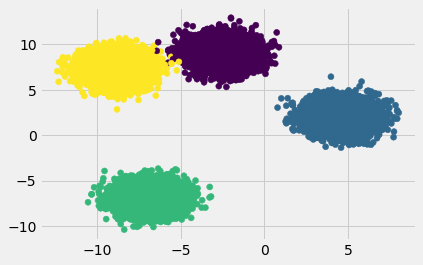

In [93]:
plt.style.use('fivethirtyeight')
plt.scatter (X[:,0],X[:,1],c=y)
plt.show()

In [94]:
OHE= OneHotEncoder().fit_transform(y.reshape(-1,1)).todense()

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [95]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, OHE, test_size=0.33, random_state=42)

In [96]:
model=Sequential()
model.add(Dense(5,input_shape=(2,),activation = "sigmoid", name = 'L1'))
model.add(Dense(4,activation ="softmax", name = 'L2'))

In [97]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 5)                 15        
_________________________________________________________________
L2 (Dense)                   (None, 4)                 24        
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


In [98]:
model.compile(
    optimizer='adam',
    loss="categorical_crossentropy", metrics = ["accuracy"]) 

In [99]:
 outcome=model.fit(X_train,y_train, epochs=20 )

Train on 13400 samples
Epoch 1/20
13400/13400 [==============================] - 1s 52us/sample - loss: 1.1784 - accuracy: 0.6408
Epoch 2/20
13400/13400 [==============================] - 0s 28us/sample - loss: 0.6536 - accuracy: 0.9996
Epoch 3/20
13400/13400 [==============================] - 0s 27us/sample - loss: 0.4031 - accuracy: 0.9996
Epoch 4/20
13400/13400 [==============================] - 0s 27us/sample - loss: 0.2705 - accuracy: 0.9996
Epoch 5/20
13400/13400 [==============================] - 0s 27us/sample - loss: 0.1927 - accuracy: 0.9996
Epoch 6/20
13400/13400 [==============================] - 0s 27us/sample - loss: 0.1430 - accuracy: 0.9995
Epoch 7/20
13400/13400 [==============================] - 0s 27us/sample - loss: 0.1092 - accuracy: 0.9996
Epoch 8/20
13400/13400 [==============================] - 0s 28us/sample - loss: 0.0852 - accuracy: 0.9995
Epoch 9/20
13400/13400 [==============================] - 0s 28us/sample - loss: 0.0675 - accuracy: 0.9996
Epoch 10/20
13

In [100]:
model.evaluate(X_test,y_test,verbose=0)

[0.0075770488454762735, 0.9998485]

In [101]:
outcome

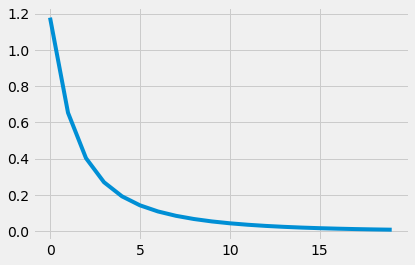

In [102]:
plt.plot(outcome.history["loss"])

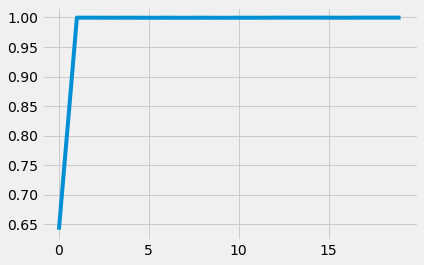

In [103]:
plt.plot(outcome.history["accuracy"])